In [15]:
#Importing usefull libraries and the data needed for the project

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('all_data.csv')

In [16]:
#exploring the dataset
print(df.head(5))
#I want to know how many countries there are
print(df.Country.unique())
## By looking at the data we can identify that only one column is catergorical (Country), the others are quantitative or temporal.
## Those are the graphs I need to create :
## Line plot to see how life expectansy is evolving overtime.
## Scatter plot comparing GDP and Life expectansy (linear relation or not).
## Bar plots to compare each country life expectansy for a specific year.
##Pair plots to analyse the relationship between life expectansy, year and GDP for eahc country.


## Before doing this I will first convert GDP into Billions:
df['GDP_billions'] = df['GDP'] / 1e9

# Then, to discriminate each country I will pick one colour for each:
country_colors = {'United States of America': '#1f77b4', 'China': '#ff7f0e', 
                 'Germany': '#2ca02c', 'Mexico': '#d62728', 
                 'Chile': '#9467bd', 'Zimbabwe': '#8c564b'}

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


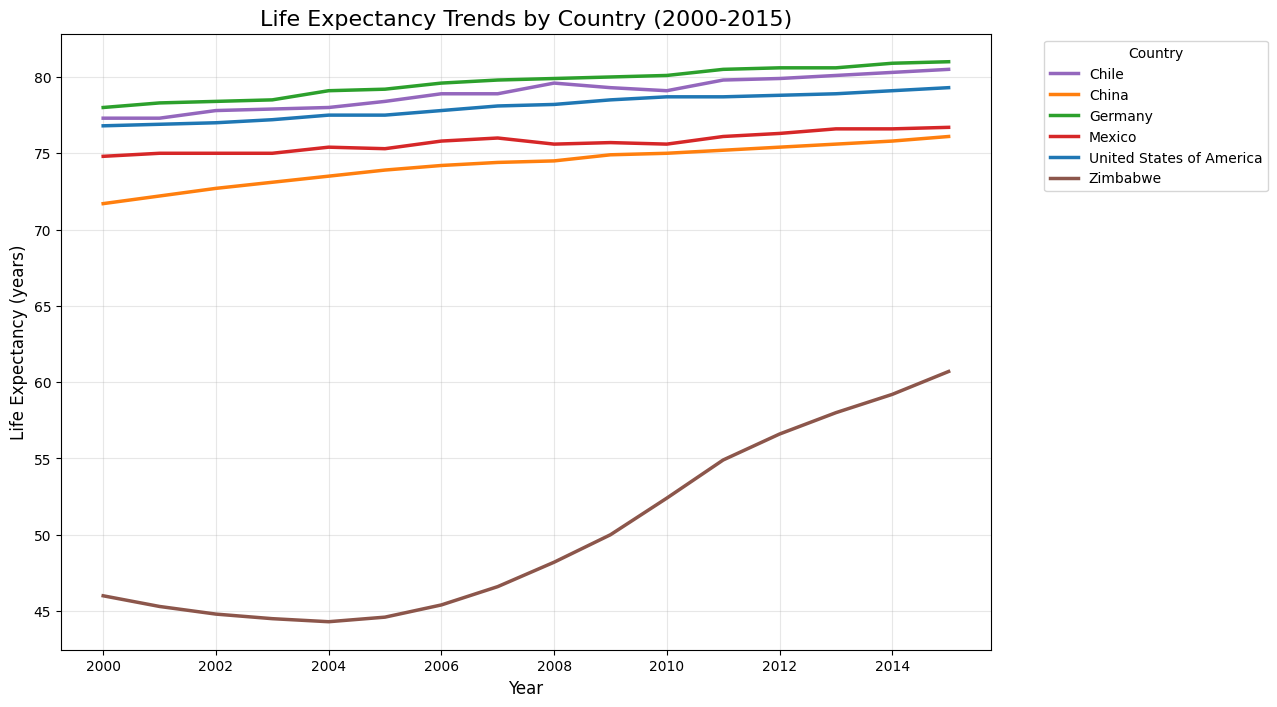

In [63]:
#Line plot to see how life expectansy is evolving overtime.
plt.figure(figsize=(12, 8))

sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', 
             hue='Country', palette=country_colors, linewidth=2.5, markers=True)

plt.title('Life Expectancy Trends by Country (2000-2015)', fontsize=16)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('Life Expectancy Trends by Country (2000-2015).png') # Saving all figs for the article.

plt.show()
plt.close()

# Interpretation : We observe a common tendency that life exp is increasing overtime.

<Figure size 1200x800 with 0 Axes>

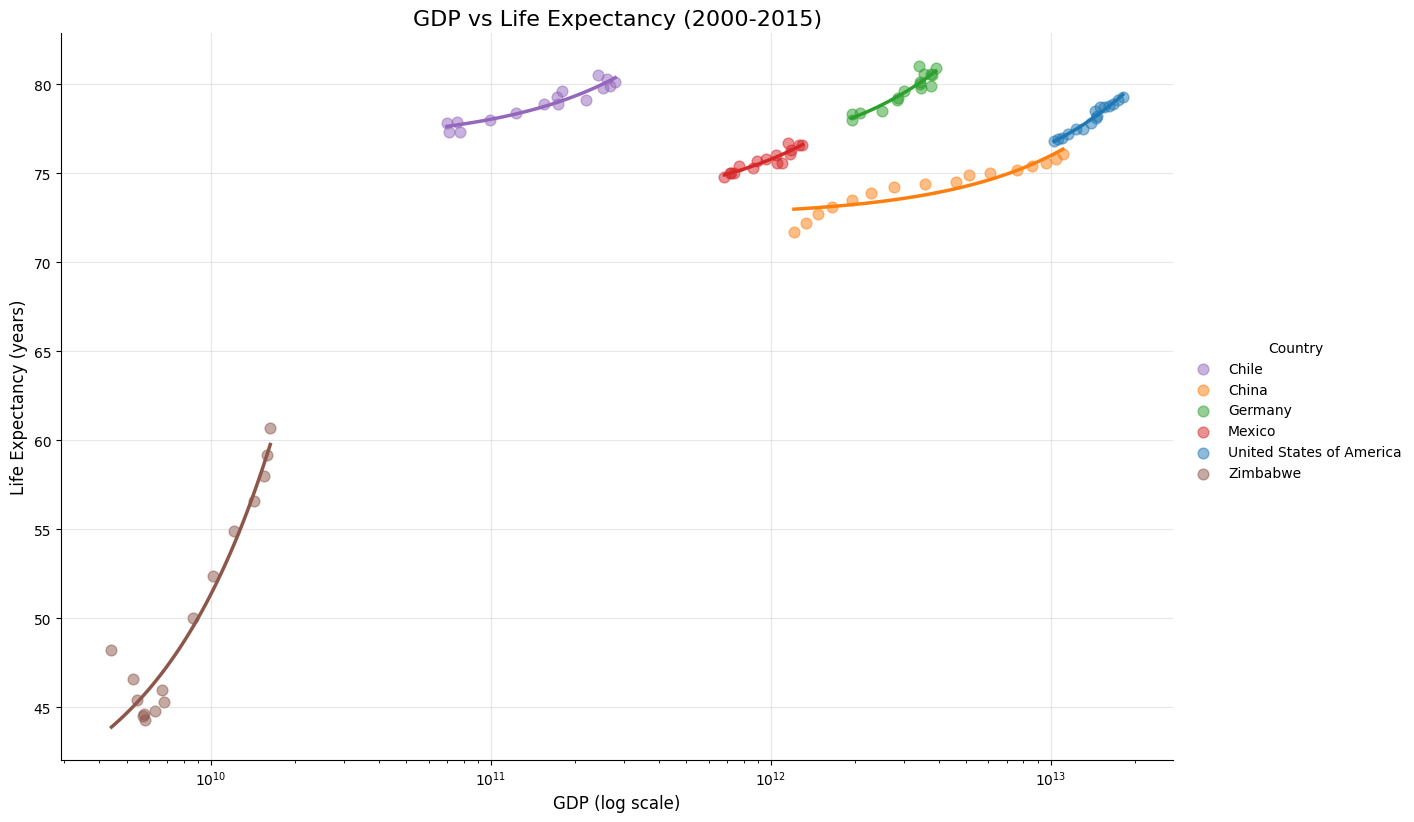

In [64]:
# Scatter plot comparing GDP and Life expectansy (linear relation or not).

plt.figure(figsize=(12, 8))

sns.lmplot(
    data=df,
    x='GDP',
    y='Life expectancy at birth (years)',
    hue='Country',
    palette=country_colors,
    height=8,
    aspect=1.5,
    ci=None,  # Remove confidence intervals
    scatter_kws={'alpha': 0.5, 's': 60},  # Customize scatter points
    line_kws={'linewidth': 2.5}  # Customize regression lines
)

plt.xscale('log') #I found this solution in the documention of matplotlib library (used for large range)

plt.title('GDP vs Life Expectancy (2000-2015)', fontsize=16)
plt.xlabel('GDP (log scale)', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.savefig('GDP vs Life Expectancy (2000-2015).png')

plt.show()
plt.close()

# Interpretation : We observe a common tendency that life as well as GDP exp is increasing overtime. In addition we can observe massive differences in the slope of this evolution depending on the country.
# One strange thing is the decreasing in 2005 in Zimbabwe. I checked online and it may be cause by the food crisis and political problems from the 2000's
# Read the related article if interested : https://en.wikipedia.org/wiki/2000s_in_Zimbabwe

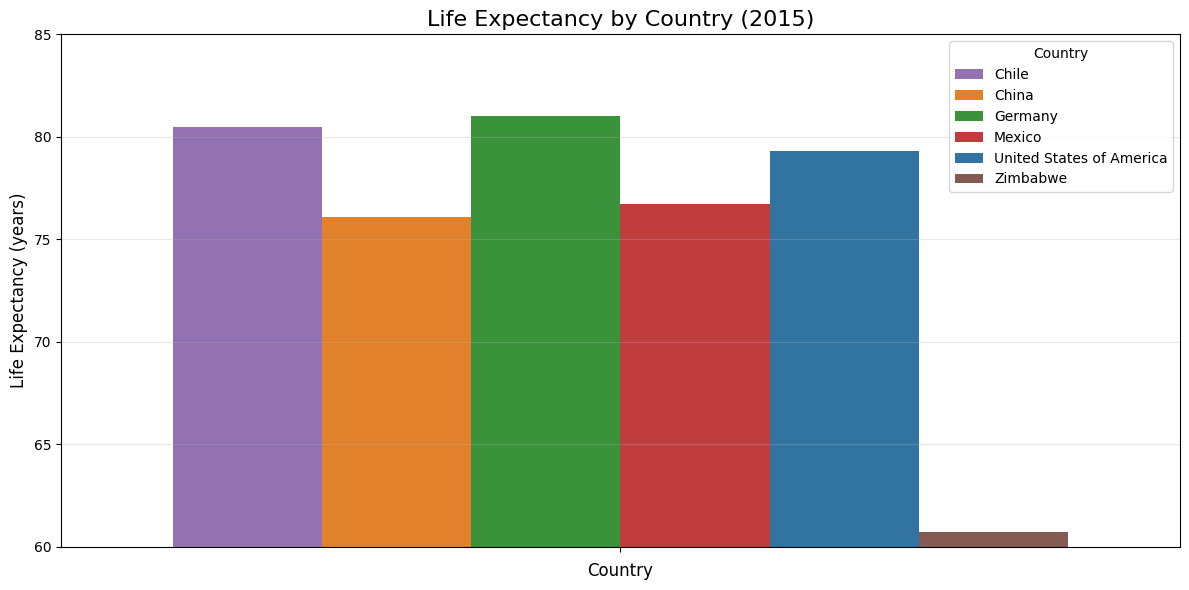

In [65]:
# Bar plots to compare each country life expectansy for a specific year.
recent_data = df[df['Year'] == 2015]

plt.figure(figsize=(12, 6))
sns.barplot(data=recent_data, hue='Country', y='Life expectancy at birth (years)', palette = country_colors)

plt.title('Life Expectancy by Country (2015)', fontsize=16)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.ylim (60,85)  # In doing so, we see better the difference between countries.
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() # to prevent label clipping
plt.grid(axis='y', alpha=0.3)

plt.savefig('Life Expectancy by Country (2015).png')

plt.show()
plt.close()

# Interpretation : We observe that Germany is the leader followed by Chile even if their GDP are lower than the U.S.

<Figure size 1500x1200 with 0 Axes>

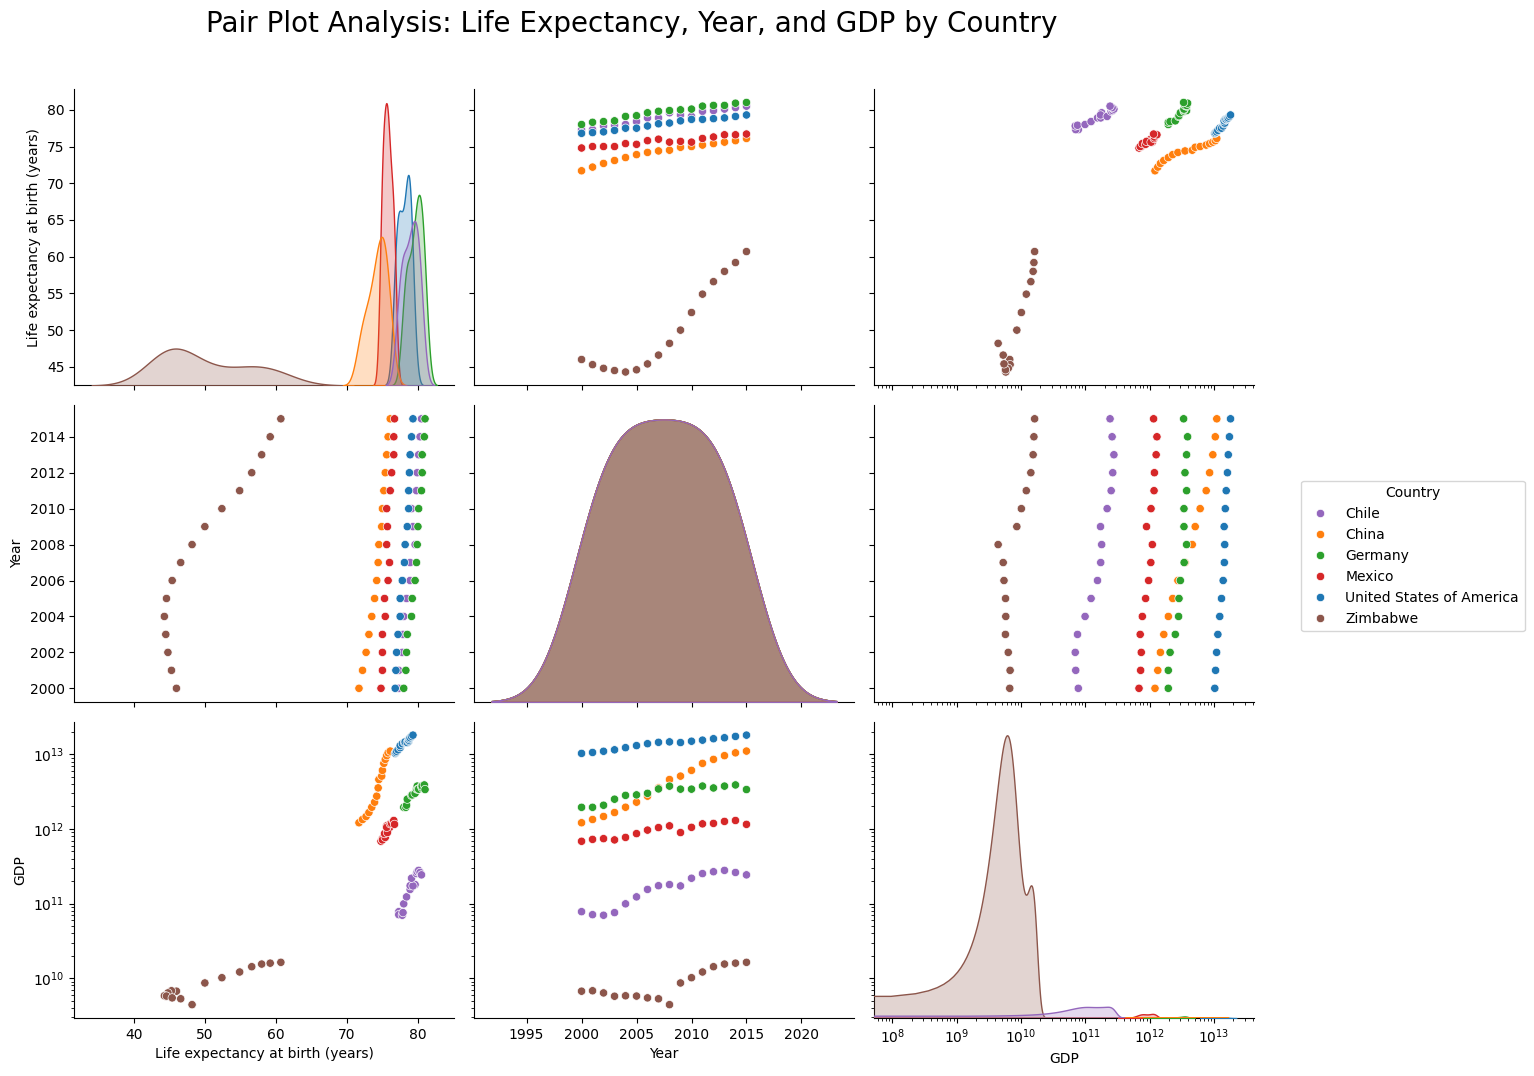

In [66]:
# Pair plots to analyse the relationship between life expectansy, year and GDP for eahc country

plt.figure(figsize=(15, 12))
pair_plot = sns.pairplot(
    df,
    hue='Country', 
    height=3.5,
    vars=['Life expectancy at birth (years)', 'Year', 'GDP'],
    palette=country_colors,
)

pair_plot.fig.suptitle('Pair Plot Analysis: Life Expectancy, Year, and GDP by Country', 
                       fontsize=20, y=1.02)

pair_plot._legend.remove()  # First remove default legend
pair_plot.fig.legend(
    handles=pair_plot._legend_data.values(),
    labels=pair_plot._legend_data.keys(),
    title='Country',
    bbox_to_anchor=(1.02, 0.5),  # Adjust position as needed
    loc='center left'
)


var_order = ['Life expectancy at birth (years)', 'Year', 'GDP']
gdp_idx = var_order.index('GDP')  # GDP is at position 2

# Apply log scale only to GDP-related axes
for i, ax_row in enumerate(pair_plot.axes):
    for j, ax in enumerate(ax_row):
        if ax is not None:
            # X-axis is GDP (column)
            if j == gdp_idx:
                ax.set_xscale('log')
            # Y-axis is GDP (row)
            if i == gdp_idx:
                ax.set_yscale('log')


plt.tight_layout()

plt.savefig('Pair Plot Analysis: Life Expectancy, Year, and GDP by Country.png')

plt.show()
plt.close()

# Interpretation : This graph sums up all the trends we identified earlier.

In [53]:
# In conclusion this projects allowed me to identify a food crisis that happened in the beginning of the milenial in Zimbabwe as well as correlating GDP increasing with life expectancy.
# Do not hesisitate to see my post on the WHO blog.